In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

train_data.shape

(10683, 11)

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


``TASK``
1) Dealing with Missing Values.

2) Data Cleaning to make our data ready for the analysis as well as model.

In [4]:
# Checking missing values in the data
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

NOTE: As we have very less missing values , so we can drop them.

In [5]:
#dropping the data
train_data.dropna(inplace=True)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Note: As 'Date_of_Journey','Dep_Time','Arrival_Time' are of DateTime format.

In [8]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [9]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [10]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month
#train_data['year']=train_data['Date_of_Journey'].dt.year

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-26 05:50:00,2021-05-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-26 18:05:00,2021-05-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-26 16:50:00,2021-05-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [13]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute
    
def drop_col(df,col):
    df.drop(col,axis=1,inplace=True)
    

In [15]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_col(train_data,'Dep_Time')

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-26 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-05-26 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-05-26 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [17]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_col(train_data,'Arrival_Time')

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
train_data['Duration'] = duration

In [20]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]= duration[i] + ' 0m'
        else:
            duration[i]='0h ' + duration[i]  

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
'2h 50m'.split(' ')[1][0:-1]

In [23]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [24]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [26]:
drop_col(train_data,'Duration')

In [27]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [28]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [29]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [30]:
def extract_cat_num(train_data):
    cat_col=[col for col in train_data.columns if train_data[col].dtype=='object']
    num_col=[col for col in train_data.columns if train_data[col].dtype!='object']
    return cat_col, num_col

In [31]:
cat_col, num_col=extract_cat_num(train_data)

In [32]:
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [33]:
num_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data and Feature Encoding

#### Nominal Data = that are not in any order or have any hierarchy(One hot encoding)
#### ordinal data = good,better, best-----label encoding

In [34]:
categorical=train_data[cat_col]

In [35]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

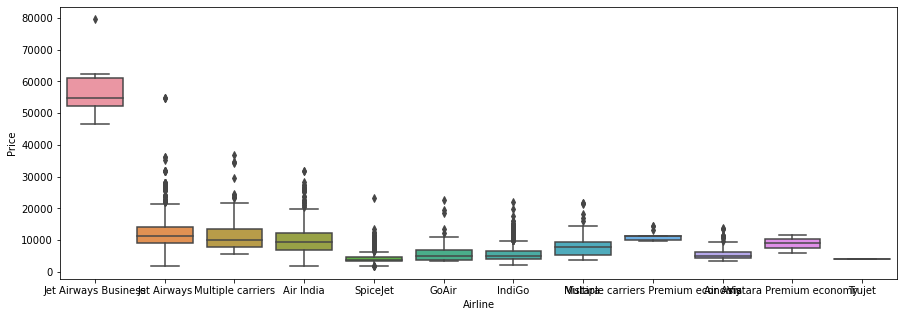

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [38]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

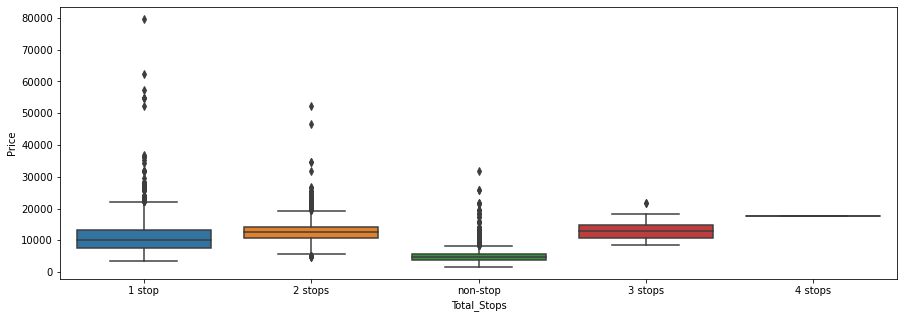

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [40]:
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [41]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

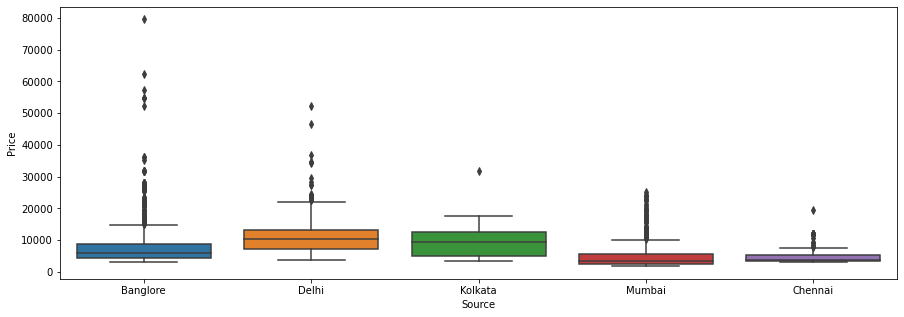

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [44]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)

In [45]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

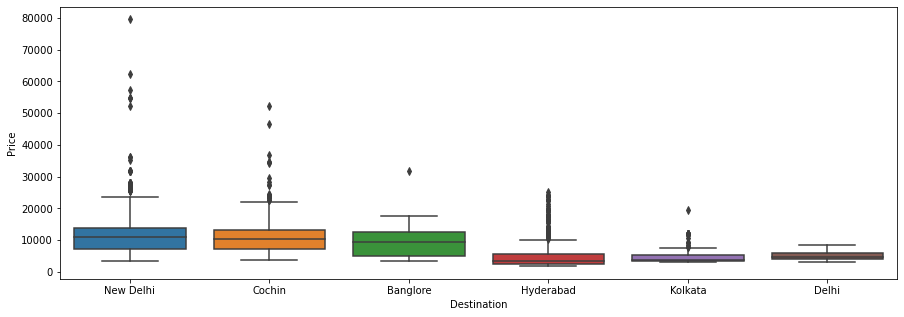

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [48]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)

In [49]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# categorical['Route_1']=categorical['Route'].str.split('→').str[0]
# categorical['Route_2']=categorical['Route'].str.split('→').str[1]
# categorical['Route_3']=categorical['Route'].str.split('→').str[2]
# categorical['Route_4']=categorical['Route'].str.split('→').str[3]
# categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [50]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [51]:
drop_col(categorical,'Route')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
dtype: int64

In [53]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [ ]:
# for i in ['Route_3', 'Route_4', 'Route_5']:
#     categorical[i].fillna('None',inplace=True)

In [ ]:
# categorical.isnull().sum()

In [54]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories


In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [56]:
drop_col(categorical,'Additional_Info')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [59]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

<ipython-input-59-e768699902ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [60]:
categorical.head()

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,0
1,Air India,Kolkata,Banglore,2
2,Jet Airways,Delhi,Cochin,2
3,IndiGo,Kolkata,Banglore,1
4,IndiGo,Banglore,New Delhi,1


In [61]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[num_col]],axis=1)

In [62]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,0,1,0,0,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,0,0,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,0,0,0,1,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,0,0,1,0,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,0,1,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [63]:
drop_col(data_train,'Airline')
drop_col(data_train,'Source')
drop_col(data_train,'Destination')

In [64]:
data_train.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [65]:
pd.set_option('max_columns',35)
data_train.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Outlier Detection and Imputation

### Separating Independent and Dependent feature

In [66]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


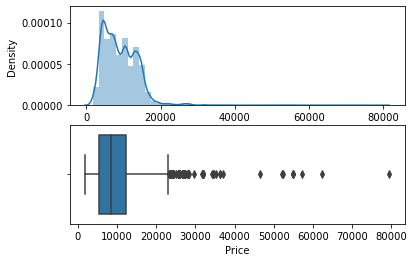

In [67]:
plot(data_train,'Price')

In [68]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


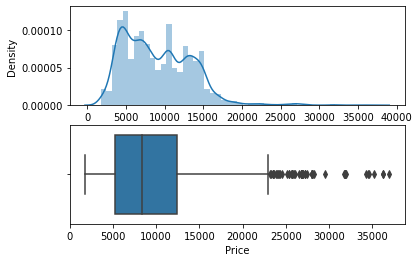

In [69]:
plot(data_train,'Price')

In [70]:
X = data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [71]:
y = data_train['Price']

### Selecting best features for feature selection

In [72]:
from sklearn.feature_selection import mutual_info_classif

In [73]:
mutual_info_classif(X,y)

array([2.15348402, 0.73948969, 0.09738299, 0.6756852 , 0.91985431,
       0.        , 0.58699022, 0.01508811, 0.32055644, 0.01110944,
       0.22118979, 0.00800271, 0.18571548, 1.52829301, 0.85233319,
       0.29048351, 1.52890307, 0.38980445, 0.29995297, 0.18679958,
       0.35019504, 1.08858593, 0.84458133, 1.42551812, 1.18669771,
       1.8377729 , 1.53952759, 1.78519684, 1.06723647])

In [74]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.165870
Air India,0.775791
GoAir,0.116804
IndiGo,0.688262
Jet Airways,0.926642
Jet Airways Business,0.007833
Multiple carriers,0.580844
Multiple carriers Premium economy,0.010408
SpiceJet,0.331024
Trujet,0.000000


In [75]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Total_Stops,2.165870
Arrival_Time_hour,1.866546
Duration_hours,1.772067
Delhi,1.579176
Arrival_Time_minute,1.547024
Cochin,1.542501
Dep_Time_hour,1.435942
Dep_Time_minute,1.236934
Duration_mins,1.064492
Journey_day,1.064412


### Applying ML Algo.

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    )

In [78]:
from sklearn import metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train, y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    predictions=model.predict(X_test)
    print('Predictions are: {}'.format(predictions))
    print('\n')
    r2_score=metrics.r2_score(y_test,predictions)
    print('r2 score is: {}'.format(r2_score))
    
    print('MAE:',metrics.mean_absolute_error(y_test,predictions))
    print('MSE:',metrics.mean_squared_error(y_test,predictions))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
    
    sns.distplot(y_test-predictions)
    
    if dump==1:
        file=open('D:\Data Analyst courses\Data Analysis Projects\Predict Price Of Airline Ticket/model.pkl','wb')
        pickle.dump(model,file)

In [79]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9537016519350847
Predictions are: [ 7343.314  15046.71    4520.61   ... 11413.4375 10171.1925  2649.08  ]


r2 score is: 0.8011218816823727
MAE: 1208.4130739043621
MSE: 3741953.3357998785
RMSE: 1934.412917605721


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


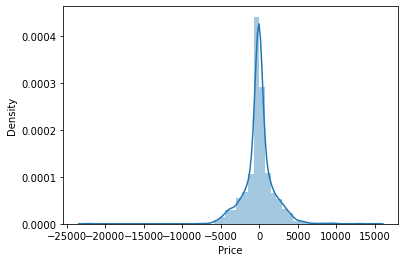

In [80]:
predict(RandomForestRegressor(),1)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

Training Score: 0.608384699141965
Predictions are: [ 6151.63954133 12728.21637152  4860.11738565 ... 11679.27962815
 10928.08492506  5409.49361031]


r2 score is: 0.5910907677452788
MAE: 1943.2489581748553
MSE: 7693753.735296183
RMSE: 2773.7616579829246


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


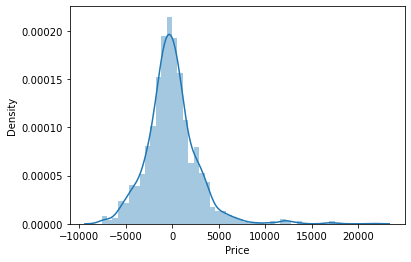

In [82]:
predict(LinearRegression(),0)

Training Score: 0.7482095985090254
Predictions are: [ 5903.  17664.4  4798.8 ... 11757.2  5277.   7174. ]


r2 score is: 0.5726344919364494
MAE: 1881.9311183902666
MSE: 8041014.275638746
RMSE: 2835.668223829922


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


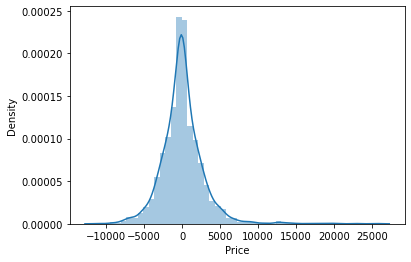

In [83]:
predict(KNeighborsRegressor(),0)

Training Score: 0.882387361029842
Predictions are: [ 7303. 15164.  4591. ... 10844. 12242.  3100.]


r2 score is: 0.667442560703726
MAE: 1452.6663547028545
MSE: 6257171.124941506
RMSE: 2501.433813823885


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


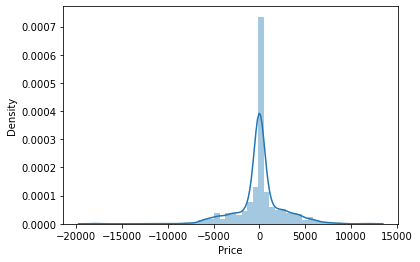

In [84]:
predict(DecisionTreeClassifier(),0)

### Hypertune the model

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
reg_rf= RandomForestRegressor()

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [89]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth': max_depth,
    'min_samples_split':[5,10,15,100]
}

In [90]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [91]:
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [92]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.9s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [93]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 21}

In [94]:
prediction=rf_random.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

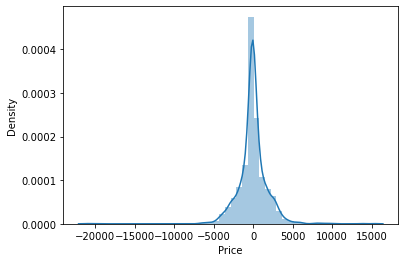

In [95]:
sns.distplot(y_test-prediction)

In [96]:
metrics.r2_score(y_test,prediction)

0.8268440875031219

In [97]:
file = open('D:\Data Analyst courses\Data Analysis Projects\Predict Price Of Airline Ticket/rf_random.pkl','wb')


In [98]:
pickle.dump(rf_random,file)

In [99]:
model=open('D:\Data Analyst courses\Data Analysis Projects\Predict Price Of Airline Ticket/model.pkl','rb')
forest=pickle.load(model)

In [100]:
predictions2=forest.predict(X_test)

In [101]:
metrics.r2_score(y_test,predictions2)

0.8011218816823727